In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Convert field names to dict for easy access.
# Can be hard coded 
# 
fields_path = '../../input/training_validation_2/fields.csv'  
fields_df = pd.read_csv(fields_path)
fields_df.columns = ['name', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6']

fields_dict = {}
fields_dictv2 = {}

for idx in range(fields_df.shape[0]):
    name = fields_df.loc[idx, 'name']

    _fields = []
    
    for f in fields_df.columns[1:]:
        if not (str(fields_df.loc[idx, f]) == 'nan'):
            _fields.append(name + "_" + str(fields_df.loc[idx, f]))
    
    fields_dict[idx] = {'name': fields_df.loc[idx, 'name'] , 'fields': _fields}
    fields_dictv2[name] = _fields
    
# fields_dict

In [3]:
feature_list = [fields_dict[6]['name']]
feature_list_regex= "|".join(["^"+f+"_" for f in feature_list])

feature_list

['EPOSPosition']

In [4]:
# import data
data_df_1 = pd.read_csv("../../data/training_validation_1.csv")
data_df_2 = pd.read_csv("../../data/training_validation_2.csv")
merged_df = pd.concat([data_df_1, data_df_2], axis=0) # Merge data frames


In [5]:
train_df = merged_df.filter(regex=feature_list_regex)
# train_df = train_df.filter(regex="vCnt|value")
# train_df = data_df_2.filter(regex="^Temperature")

In [6]:
train_df.head()

,EPOSPosition_vCnt,EPOSPosition_vFreq,EPOSPosition_vMax,EPOSPosition_vMin,EPOSPosition_vStd,EPOSPosition_vTrend,EPOSPosition_value
0,0,0.000000,NaN,NaN,NaN,NaN,NaN
1,76,7.531854,55.0,0.0,17.659679,0.326398,7.631579
2,76,7.518368,55.0,0.0,24.197376,0.079494,18.986842
3,76,7.563048,55.0,-36.0,26.353378,0.197307,13.302632
4,76,7.563380,55.0,-36.0,27.693499,0.160834,12.065789


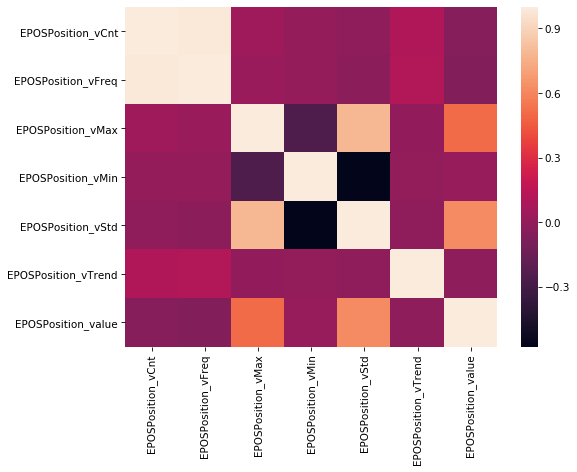

In [7]:
fig = plt.figure(figsize=(8,6), dpi=75)
sns.heatmap(train_df.corr(),annot=False)

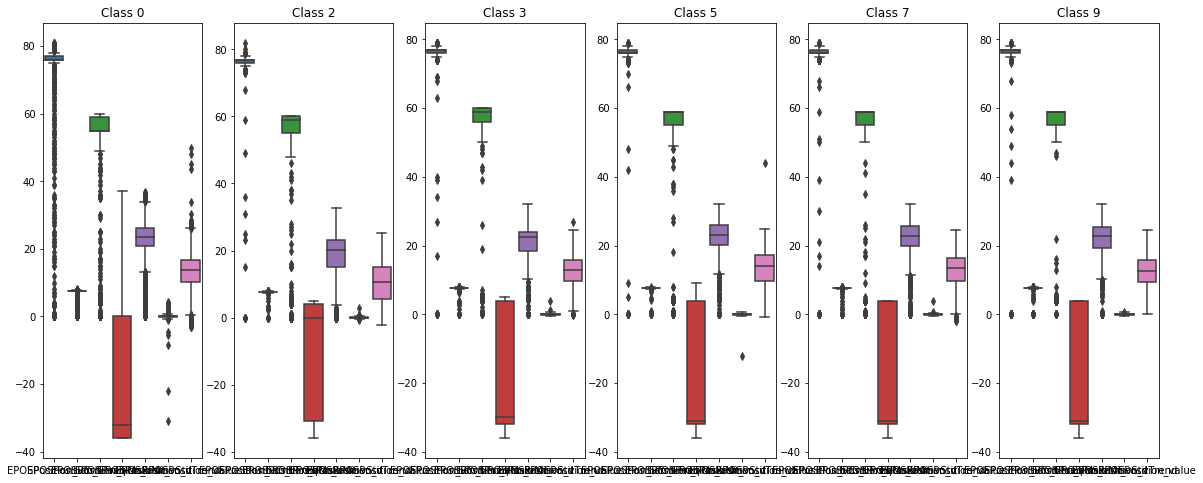

In [8]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = data_df_2['class'].unique()

fig, axes = plt.subplots(1, len(classes), sharex=True, figsize=(20,8))
# fig.suptitle('1 row x 2 columns axes with no data')

for idx, c in enumerate(classes):
    df = train_df[merged_df['class'] == c].copy()
#     df = train_df.copy()
    sns.boxplot(data=df, ax=axes[idx])
    axes[idx].set_title('Class '+str(c))


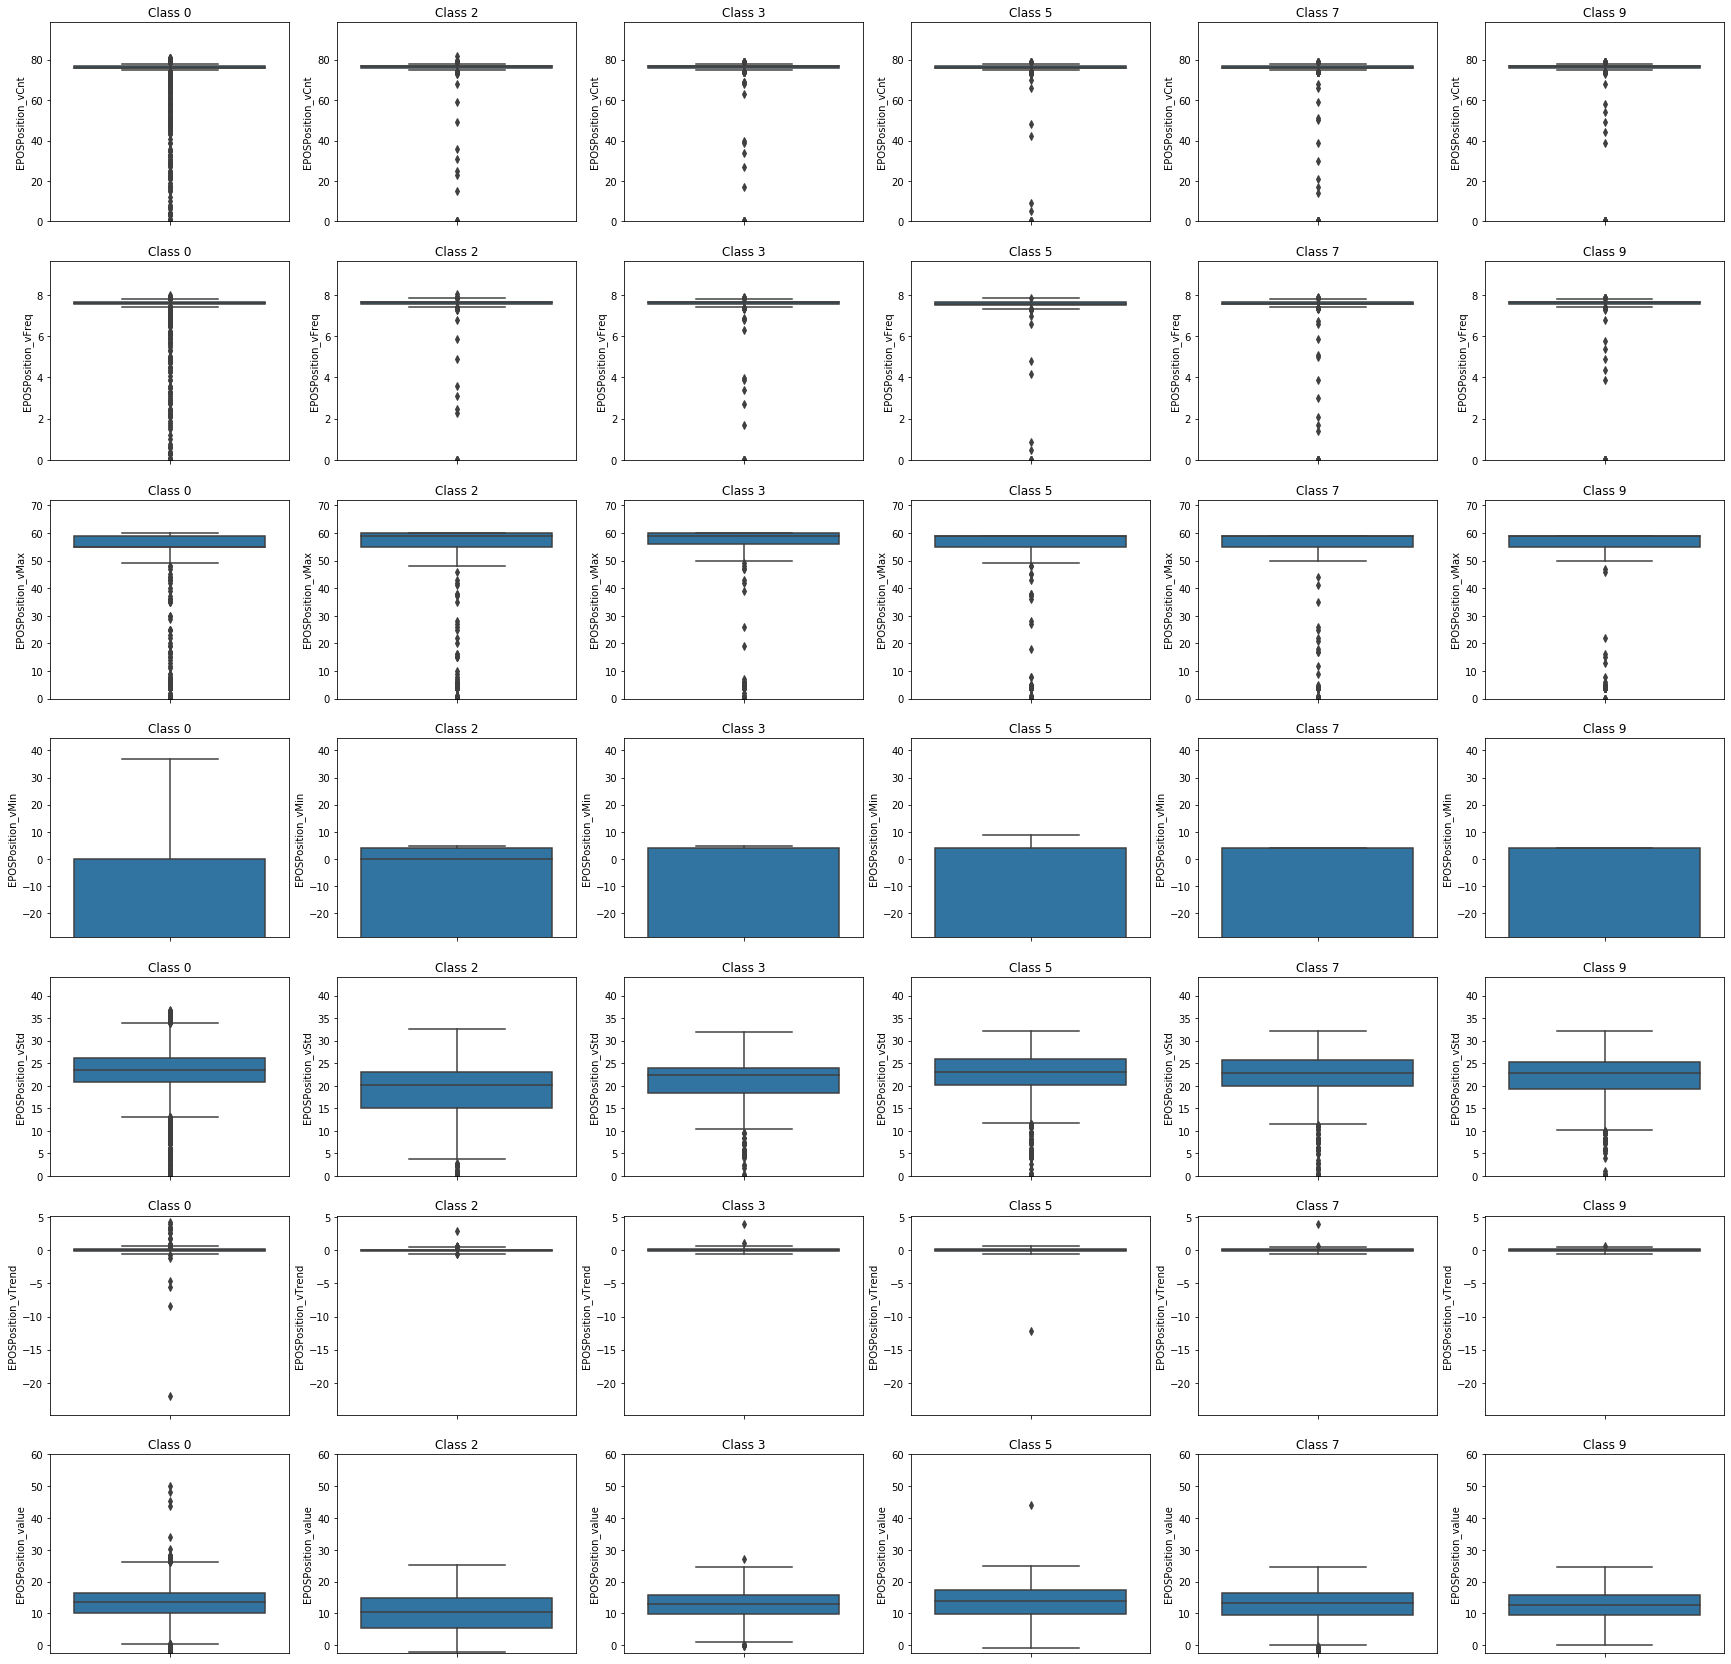

In [9]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = data_df_2['class'].unique()
features = train_df.columns

fig, axes = plt.subplots(len(features), len(classes), sharex=True, figsize=(30,30))
# print (axes)
# fig.suptitle('1 row x 2 columns axes with no data')

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()
#         print (f, c, df2.columns)
        sns.boxplot(y=df2[f], ax=axes[idx1, idx2])
        axes[idx1, idx2].set_title('Class '+str(c))
        axes[idx1, idx2].set_ylim(0.8*df[f].min(), 1.2*df[f].max())


In [10]:
# classes = data_df_2['class'].unique()
# features = train_df.columns

# fig, axes = plt.subplots(len(features), 1, sharex=True, figsize=(30,16))

# for idx1, f in enumerate(features):
#     df = data_df_2[[f, 'class']].copy()
#     axes[idx1].set_title('Feature '+str(f))
#     for idx2, c in enumerate(classes):
#         df2 = df[df['class'] == c].copy()
#         axes[idx1].boxplot(x=df2[f], positions=[idx2], labels=[c])
    


In [11]:
# train_df2 = pd.concat([data_df_2['class'], train_df], axis=1)
# axes = train_df2.groupby('class').boxplot(figsize=(20, 10))

In [12]:
classes = data_df_2['class'].unique()
features = train_df.columns

new_df = pd.DataFrame()

df_list = []

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    data = [[
        99, f, df[f].max(), df[f].min(), df[f].std(), df[f].mean(), df[f].median(), df[f].count(), df[f].isna().sum(),
        ]]

    data_df = pd.DataFrame(data)

    df_list.append(data_df)

    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()

        data = [[
            c, f, df2[f].max(), df2[f].min(), df2[f].std(), df2[f].mean(), df2[f].median(), df2[f].count(), df2[f].isna().sum(),
            ]]
        
        data_df = pd.DataFrame(data)
        df_list.append(data_df)
        
new_df = pd.concat(df_list, axis=0)
        
new_df.columns = ['class', 'feature', 'max', 'min', 'std', 'mean', 'median', 'Count', 'NA_count']

In [14]:
new_df[new_df['class']==99].sum()

class                                                     693
feature     EPOSPosition_vCntEPOSPosition_vFreqEPOSPositio...
max                                                   278.152
min                                                  -70.1842
std                                                   49.0842
mean                                                  154.956
median                                                146.144
Count                                                  276395
NA_count                                                  882
dtype: object

In [15]:
missing = 0

for c in classes:
    class_df = merged_df[merged_df['class']==c]
    runs = class_df['run'].unique()
    for r in runs:
        run_df = class_df[class_df['run'] == r]
        for f in features:
            f_df = run_df.filter([f]).copy().reset_index()
            del f_df['index']
            l = len(f_df)
            n_df = f_df[f_df[f].isna()]
#             if len(f_df) != len(n_df): print (c, r, f, len(f_df), len(n_df))
            if (len(n_df) == 0): continue
            missing += len(n_df)
            for i in list(n_df.index):
                if ((i == 0) | (i == l-1)): 
                    print ('NA at start or end')
                else:
                    print (c, r, f, len(f_df), list(n_df.index))
print (missing)

NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
0 1 EPOSPosition_vMax 363 [0, 1, 362]
NA at start or end
NA at start or end
0 1 EPOSPosition_vMin 363 [0, 1, 362]
NA at start 

NA at start or end
0 67 EPOSPosition_vMax 1079 [0, 1]
NA at start or end
0 67 EPOSPosition_vMin 1079 [0, 1]
NA at start or end
0 67 EPOSPosition_vStd 1079 [0, 1]
NA at start or end
0 67 EPOSPosition_vTrend 1079 [0, 1]
NA at start or end
0 67 EPOSPosition_value 1079 [0, 1]
NA at start or end
0 6 EPOSPosition_vMax 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSPosition_vMax 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSPosition_vMax 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSPosition_vMax 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSPosition_vMax 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSPosition_vMax 376 [0, 1, 2, 3, 4, 5, 6, 375]
NA at start or end
NA at start or end
0 6 EPOSPosition_vMin 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSPosition_vMin 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSPosition_vMin 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSPosition_vMin 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSPosition_vMin 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSPosition_vMin 376 [0, 1, 2, 3, 4, 5, 6, 375]
NA at start or end
NA at start or 

3 3 EPOSPosition_vMin 1080 [0, 1, 2, 1079]
NA at start or end
NA at start or end
3 3 EPOSPosition_vStd 1080 [0, 1, 2, 1079]
3 3 EPOSPosition_vStd 1080 [0, 1, 2, 1079]
NA at start or end
NA at start or end
3 3 EPOSPosition_vTrend 1080 [0, 1, 2, 1079]
3 3 EPOSPosition_vTrend 1080 [0, 1, 2, 1079]
NA at start or end
NA at start or end
3 3 EPOSPosition_value 1080 [0, 1, 2, 1079]
3 3 EPOSPosition_value 1080 [0, 1, 2, 1079]
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
5 2 EPOSPosition_vMax 1078 [0, 1, 2]
5 2 EPOSPosition_vMax 1078 [0, 1, 2]
NA at start or end
5 2 EPOSPosition_vMin 1078 [0, 1, 2]
5 2 EPOSPosition_vMin 1078 [0, 1, 2]
NA at start or end
5 2 EPOSPosition_vStd 1078 [0, 1, 2]
5 2 EPOSPosition_vStd 1078 [0, 1,

NA at start or end
9 3 EPOSPosition_vMax 1079 [0, 1, 2, 1078]
9 3 EPOSPosition_vMax 1079 [0, 1, 2, 1078]
NA at start or end
NA at start or end
9 3 EPOSPosition_vMin 1079 [0, 1, 2, 1078]
9 3 EPOSPosition_vMin 1079 [0, 1, 2, 1078]
NA at start or end
NA at start or end
9 3 EPOSPosition_vStd 1079 [0, 1, 2, 1078]
9 3 EPOSPosition_vStd 1079 [0, 1, 2, 1078]
NA at start or end
NA at start or end
9 3 EPOSPosition_vTrend 1079 [0, 1, 2, 1078]
9 3 EPOSPosition_vTrend 1079 [0, 1, 2, 1078]
NA at start or end
NA at start or end
9 3 EPOSPosition_value 1079 [0, 1, 2, 1078]
9 3 EPOSPosition_value 1079 [0, 1, 2, 1078]
NA at start or end
9 5 EPOSPosition_vMax 361 [359, 360]
NA at start or end
9 5 EPOSPosition_vMin 361 [359, 360]
NA at start or end
9 5 EPOSPosition_vStd 361 [359, 360]
NA at start or end
9 5 EPOSPosition_vTrend 361 [359, 360]
NA at start or end
9 5 EPOSPosition_value 361 [359, 360]
NA at start or end
882
